In [2]:
import FdsPy.qe.myqengine as qe
import pandas as pd
indices = [('SP50','S&P 500'),
           ('180461','Nikkei 225'),
           ('180555','FTSE 100'),
           ('180596','DAX'),
           ('180354','SENSEX'),
           ('180264','IBOVESPA'),
           ('180454','Tadawul All Share')]

data_dict= {}
for ticker in indices:
    data_dict[f"Market Cap | {ticker[1]}"] = f"ZAV(USUM(PMWU(BENCH:{ticker[0]})=1,FREF_MARKET_VALUE_COMPANY(0,USD)))"

for ticker in indices:
    data_dict[f"Number of Constituents | {ticker[1]}"] = f"ZAV(UCOUNT(PMWU(BENCH:{ticker[0]})=1,FREF_MARKET_VALUE_COMPANY(0,USD)))"

In [3]:

ts = qe.TimeSeries(start_date = '0M-35AY',end_date='0M',frequency='M')
univ = qe.IdUniverse(['DUMMY'])
req = qe.Calculation(universe = univ,
                     dates = ts,
                     data_dict=data_dict)

req.query()

req.data

,DATE,UNIVERSE,Market Cap | S&P 500,Market Cap | Nikkei 225,Market Cap | FTSE 100,Market Cap | DAX,Market Cap | SENSEX,Market Cap | IBOVESPA,Market Cap | Tadawul All Share,Number of Constituents | S&P 500,Number of Constituents | Nikkei 225,Number of Constituents | FTSE 100,Number of Constituents | DAX,Number of Constituents | SENSEX,Number of Constituents | IBOVESPA,Number of Constituents | Tadawul All Share
0,19880831,DUMMY,1.925377e+06,1.472637e+06,4.499161e+05,1.433362e+05,7.113612e+03,21604.500214,1.384987e+05,494.0,173.0,95.0,24.0,17.0,4.0,30.0
1,19880930,DUMMY,2.002553e+06,1.512277e+06,4.737581e+05,1.539768e+05,7.927661e+03,23023.856263,1.526874e+05,494.0,173.0,95.0,24.0,17.0,4.0,30.0
2,19881031,DUMMY,2.028305e+06,1.598141e+06,5.057376e+05,1.607837e+05,7.697555e+03,19464.981845,1.608647e+05,495.0,173.0,95.0,24.0,17.0,4.0,30.0
3,19881130,DUMMY,1.980848e+06,1.711929e+06,5.054562e+05,1.567655e+05,8.144666e+03,15654.897807,1.587094e+05,495.0,173.0,95.0,24.0,17.0,4.0,30.0
4,19881230,DUMMY,2.008558e+06,1.704500e+06,5.116336e+05,1.643372e+05,7.707886e+03,18528.936865,1.743310e+05,495.0,174.0,95.0,24.0,17.0,4.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,20230428,DUMMY,3.786986e+07,3.785697e+06,2.686659e+06,1.785013e+06,2.153199e+06,765219.154840,2.729358e+06,503.0,225.0,100.0,40.0,101.0,88.0,40.0
417,20230531,DUMMY,3.814698e+07,3.845258e+06,2.500518e+06,1.660303e+06,2.216092e+06,775663.574220,2.496566e+06,503.0,225.0,100.0,40.0,101.0,86.0,40.0
418,20230630,DUMMY,4.058070e+07,4.028212e+06,2.588068e+06,1.747966e+06,2.327487e+06,895036.257424,2.679098e+06,503.0,225.0,100.0,40.0,101.0,86.0,40.0
419,20230731,DUMMY,4.188289e+07,4.149711e+06,2.677310e+06,1.787809e+06,2.358469e+06,930709.066965,2.738083e+06,503.0,225.0,100.0,40.0,101.0,85.0,40.0


In [4]:
df = req.data
i = 0
for x in range(2,9):
    df[f"Avg. Market Val per Consituent | {indices[i][1]}"] = df[df.columns[x]]/ df[df.columns[(x+7)]]
    i+=1
df['DATE'] = pd.to_datetime(df['DATE'])
cols = list(df.columns[-7:])
cols.append("DATE")
df_plot = df[cols].set_index("DATE")


df_plot = pd.DataFrame(df_plot.stack().rename({0:'Avg. Mkt Val per Consituent'})).rename(columns = {0:'Avg. Mkt Val Per Constituent'})


df_plot['label'] = df_plot.index.get_level_values(1)
df_plot['label_plot']=df_plot['label'].str.split('|')
df_plot['name'] = df_plot['label_plot'].apply(lambda x:x[1])

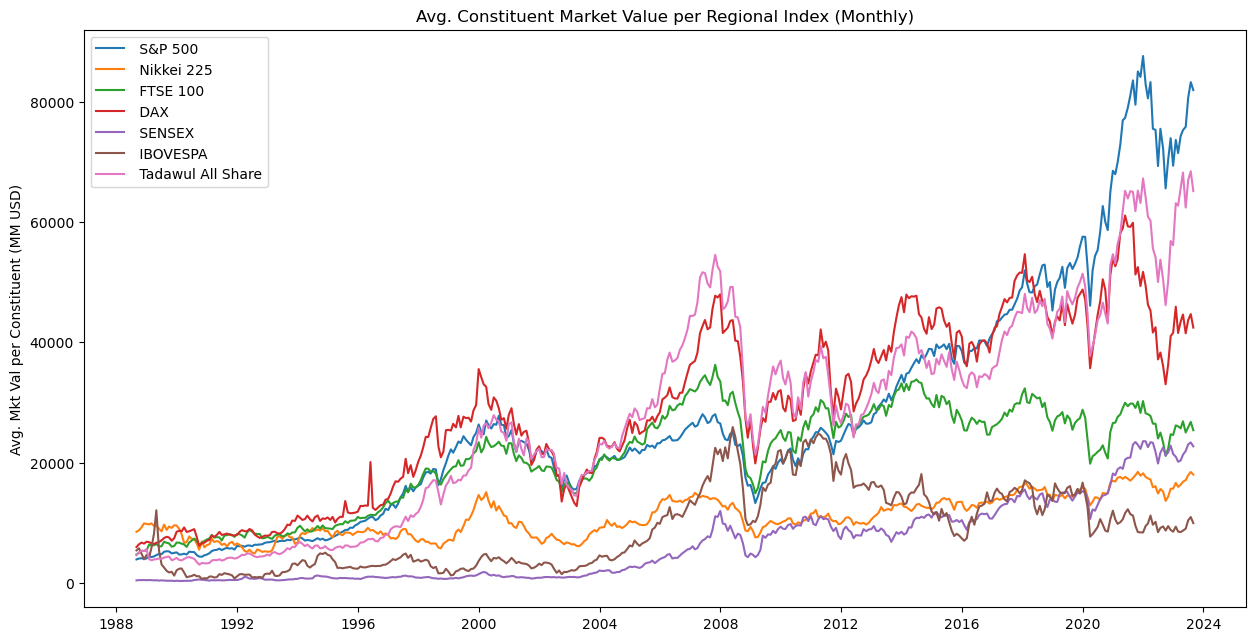

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(figsize = (15,7.5))
sns.lineplot(data = df_plot,
             x= 'DATE',
             y= 'Avg. Mkt Val Per Constituent',
             hue = 'name')

plt.ylabel('Avg. Mkt Val per Constituent (MM USD)')
plt.title('Avg. Constituent Market Value per Regional Index (Monthly)')
plt.legend().set_title('')
plt.xlabel('')
plt.savefig('regional_indices_avg_market_val.png')
plt.show()